## Simple Feed Forward Network

Here, we will try to use a simple feed forward network to learn some logical functions (AND, XOR).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.mlab import griddata
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, Button, IntSlider, FloatSlider
import matplotlib as mpl
import matplotlib.colors as colors
from IPython.display import Image, display

% matplotlib notebook

Let's have a look at the AND problem first:

In [2]:
# inputs:
X = np.array([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0],[1.0, 1.0]])
# labels:
Y_ = np.array([[0.0],[0.0],[0.0],[1.0]])

First, let's have a look at the input space. 

<IPython.core.display.Javascript object>


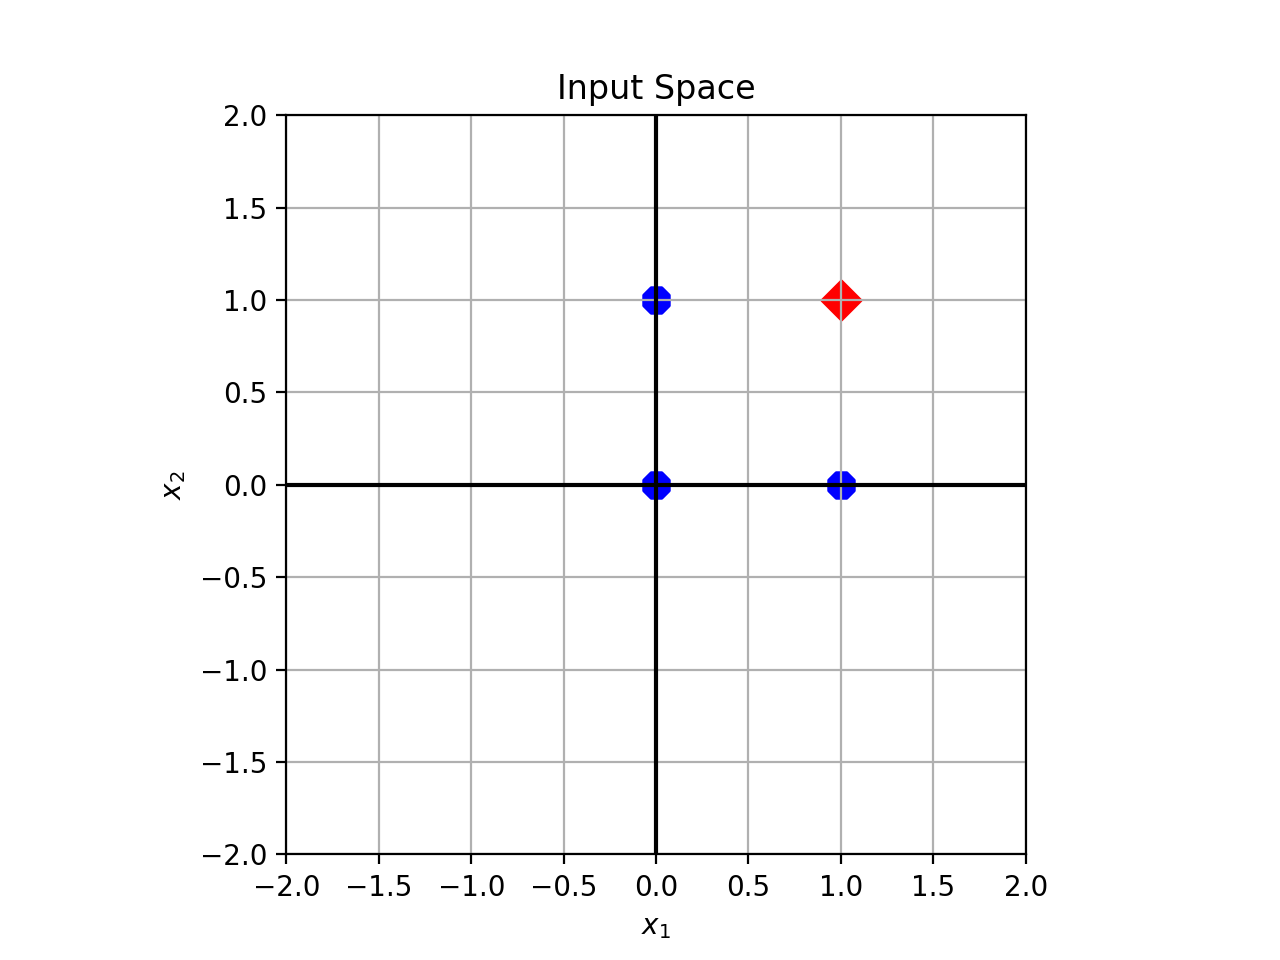

In [3]:
def prepare_plot(ax):
    ax.set_xlim([-2.0, 2.0])
    ax.set_ylim([-2.0, 2.0])
    ax.set_aspect('equal')
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title('Input Space')
    
def plot_samples(ax, XXX, YYY):
    for row in range(XXX.shape[0]):
        x1 = XXX[row, 0]
        x2 = XXX[row, 1]
        y = YYY[row, 0]
        marker = 'D' if y > 0.0 else '8'
        color = 'red' if y > 0.0 else 'blue'
        ax.scatter(x1, x2, marker= marker, s=100, c=color)  
    
def plot_input_space(ax, XX, YY):
    prepare_plot(ax)
    plot_samples(ax, XX, YY)


fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)

plot_input_space(ax1, X, Y_)

In this space, we want to find a function that can predict the value ($y$) for every given $(x_1, x_2)$.

$$
y = f(x_1, x_2)
$$
<br>

Let's have a look at each neuron in this space. Each neuron in the input layer calculates a linear combination of the inputs:

![simple linear node](images/simpleNN_linear.png)
<br>

$$
z_1 = w_{11} x_1 + w_{21} x_2 + b_1 = \mathbf{w}^T \mathbf{x} + b_1
$$



<IPython.core.display.Javascript object>


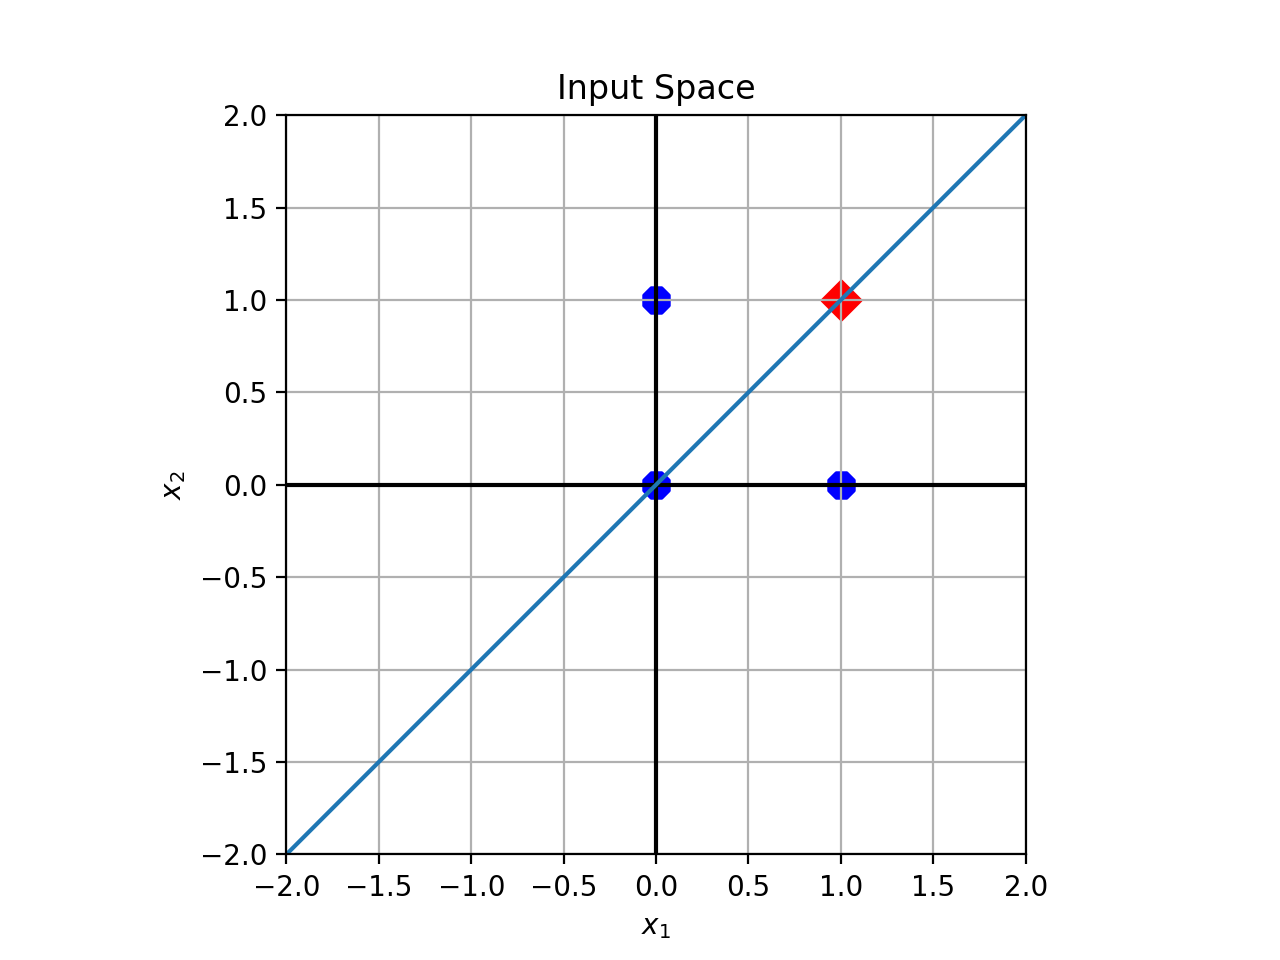

interactive(children=(FloatSlider(value=-1.0, description='w11', max=2.0, min=-2.0, step=0.05), FloatSlider(value=1.0, description='w21', max=2.0, min=-2.0, step=0.05), FloatSlider(value=0.0, description='b1', max=2.0, min=-2.0, step=0.05), Output()), _dom_classes=('widget-interact',))

<function __main__.update_params>

In [4]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
plt.ion()
fig2.show()
fig2.canvas.draw()

plot_input_space(ax2, X, Y_)
x1 = np.linspace(-2.0,2.0,10000)
x2 = x1*1.0
line, = ax2.plot(x1, x2)

def update_params(w11=-1, w21=1, b1=0):
    if w21 != 0:
        x2 = (-w11/w21)*x1 + (-b1/w21)
        line.set_ydata(x2)
        fig2.canvas.draw()

interact(update_params,w11=(-2.0, 2.0, 0.05), w21=(-2.0, 2.0, 0.05), b1=(-2.0, 2.0, 0.05))

Change the parameters to see how the line changes in the input state.

Now, let's focus on the value of $z_1$, the output of the same neuron. This neuron is a function that maps the input space into a single real value ($z_1$). <br>
Let's see how thus function works for every selection of parameters.

In [5]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

<IPython.core.display.Javascript object>


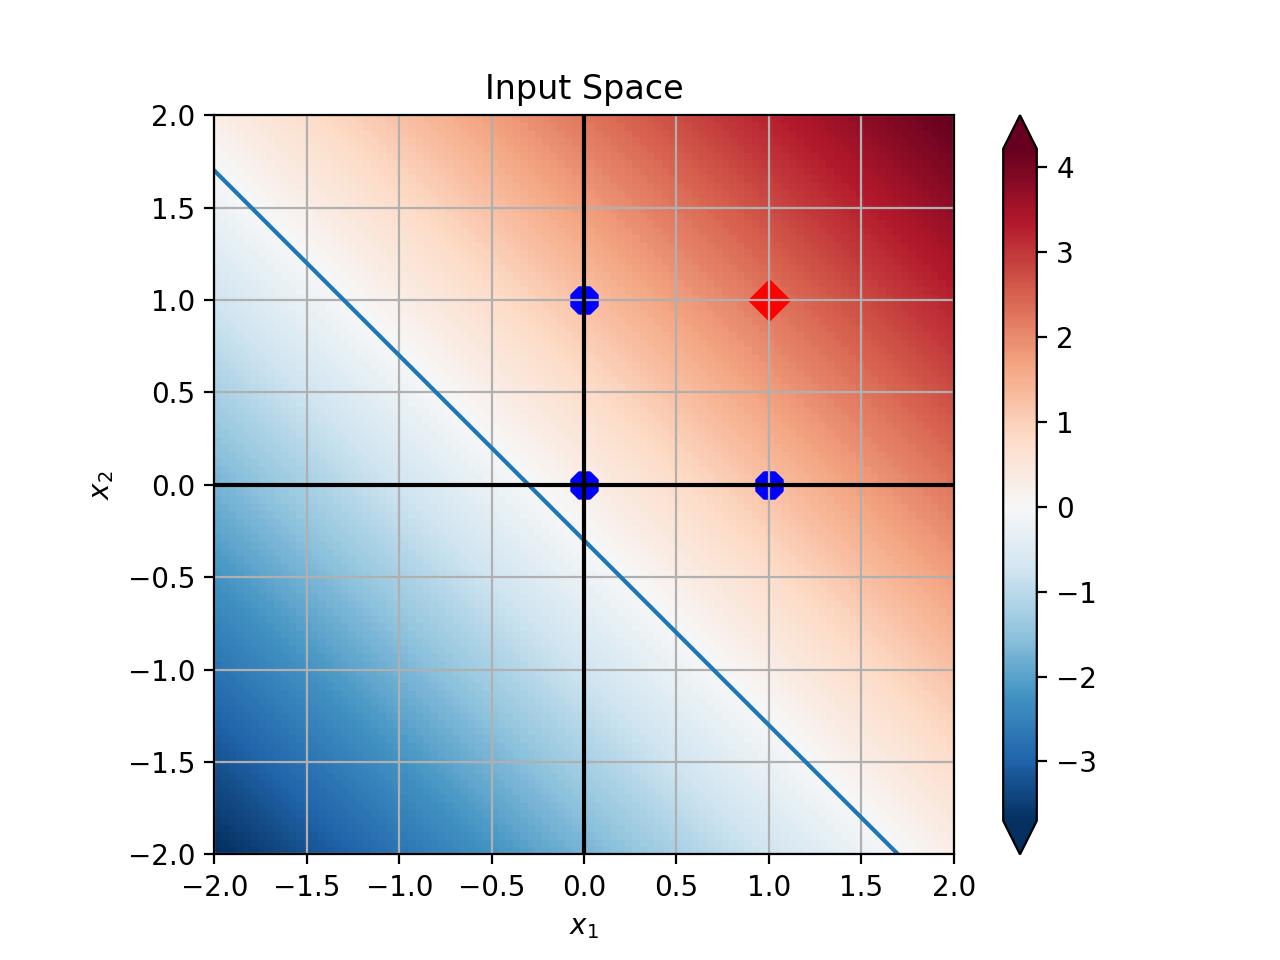

interactive(children=(FloatSlider(value=1.0, description='w11', max=2.0, min=-2.0, step=0.05), FloatSlider(value=1.0, description='w21', max=2.0, min=-2.0, step=0.05), FloatSlider(value=0.3, description='b1', max=2.0, min=-2.0, step=0.05), Output()), _dom_classes=('widget-interact',))

<function __main__.update_space>

In [6]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(1, 1, 1)

plt.ion()
fig3.show()
fig3.canvas.draw()

x1 = np.linspace(-2.0,2.0,100)
x2 = x1*1.0
line, = ax3.plot(x1, x2)
x1v, x2v = np.meshgrid(x1, x2)

z = 1*x1v + 1*x2v + 0.3
z = z[:-1, :-1]
grid = ax3.pcolormesh(x1v, x2v, z, 
                      norm=MidpointNormalize(midpoint=0.),
                      cmap='RdBu_r')

fig3.colorbar(grid, ax=ax3, extend='both')
plot_input_space(ax3, X, Y_)


def update_space(w11=1, w21=1, b1=0.3):
    zzz = w11*x1v + w21*x2v + b1
    zz = zzz[:-1, :-1]
    if w21 != 0:
        x2 = (-w11/w21)*x1 + (-b1/w21)
        line.set_ydata(x2)
    grid.set_array(zz.ravel())
    fig3.canvas.draw()

interact(update_space,w11=(-2.0, 2.0, 0.05), w21=(-2.0, 2.0, 0.05), b1=(-2.0, 2.0, 0.05))

Change the parameters and see how the output of the neuron changes for every point in the input space.<br>
Having this function, we can easily calculate the output of the neuron for our samples. <br>

Let's visualize this value for each sample.

<IPython.core.display.Javascript object>


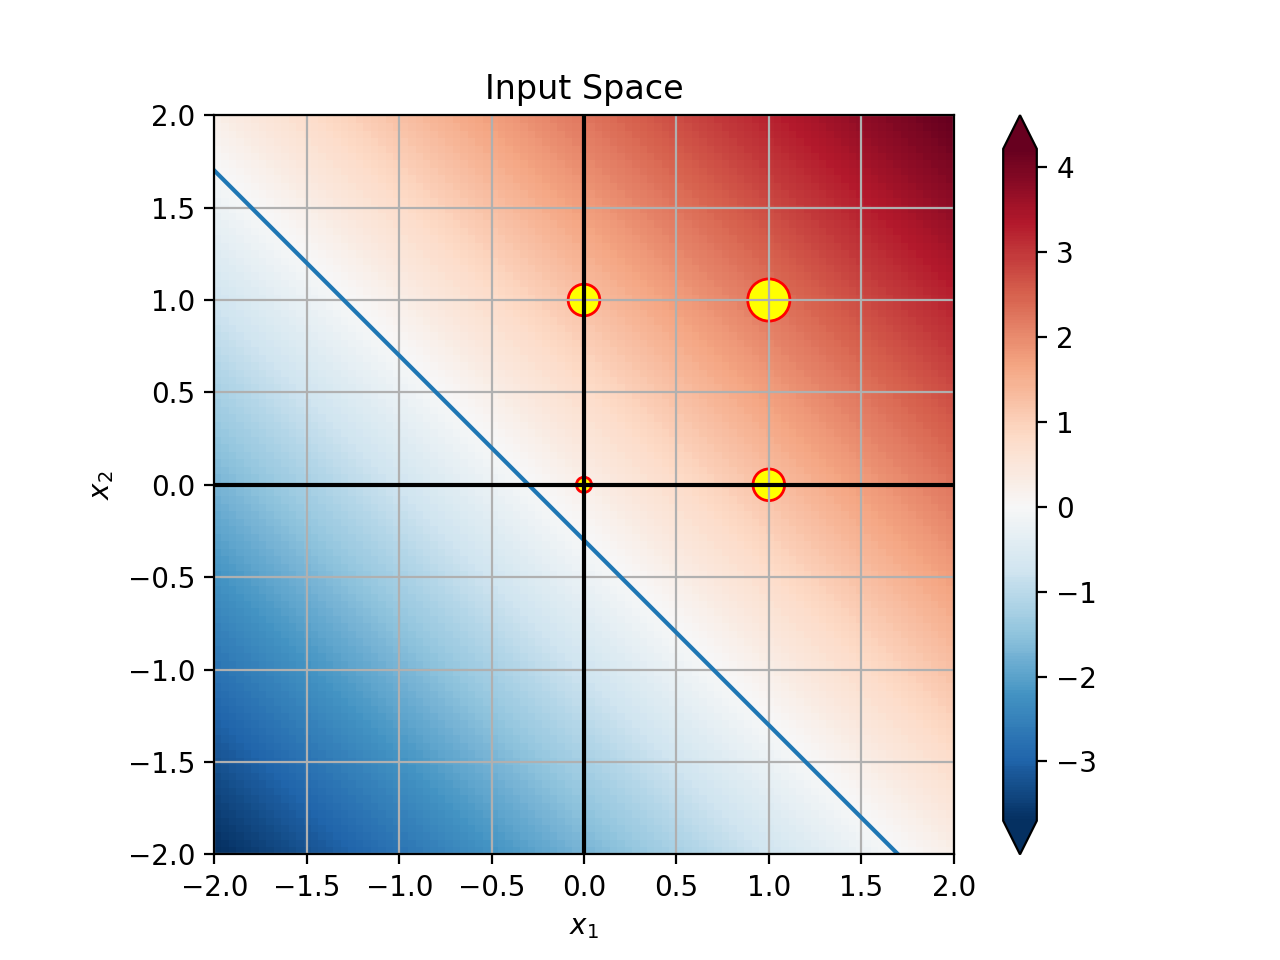

interactive(children=(FloatSlider(value=1.0, description='w11', max=2.0, min=-2.0, step=0.05), FloatSlider(value=1.0, description='w21', max=2.0, min=-2.0, step=0.05), FloatSlider(value=0.3, description='b1', max=2.0, min=-2.0, step=0.05), Output()), _dom_classes=('widget-interact',))

<function __main__.update_space_2>

In [7]:
fig4 = plt.figure()
ax4 = fig4.add_subplot(1, 1, 1)

plt.ion()
fig4.show()
fig4.canvas.draw()

x1 = np.linspace(-2.0,2.0,100)
x2 = x1*1.0
line, = ax4.plot(x1, x2)
x1v, x2v = np.meshgrid(x1, x2)

z = 1*x1v + 1*x2v + 0.3
z = z[:-1, :-1]
grid = ax4.pcolormesh(x1v, x2v, z, 
                      norm=MidpointNormalize(midpoint=0.),
                      cmap='RdBu_r')

fig4.colorbar(grid, ax=ax4, extend='both')
scat = ax4.scatter(X[:,0], X[:,1], facecolor='yellow', edgecolor='red')
prepare_plot(ax4)

def update_space_2(w11=1, w21=1, b1=0.3):
    zzz = w11*x1v + w21*x2v + b1
    zz = zzz[:-1, :-1]
    sizes = [100*(w11*X[i,0] + w21*X[i,1]+b1) for i in range(X.shape[0])]
    if w21 != 0:
        x2 = (-w11/w21)*x1 + (-b1/w21)
        line.set_ydata(x2)
    
    grid.set_array(zz.ravel())
    scat.set_sizes(sizes)
    fig4.canvas.draw()

interact(update_space_2,w11=(-2.0, 2.0, 0.05), w21=(-2.0, 2.0, 0.05), b1=(-2.0, 2.0, 0.05))

As you can see in the above experiment, the neuron assigns a value (depivted by size of circles) for every sample in the input state. When the parameters of the neuron changes, these values change accordingly.
<br>
The goal is to find a setting (i.e. a set of parameters) for which we can separate samples by observing the size of the circles.

## Introducing Non-linearity

As we saw in the last interactive diagram, the circles on samples points change size as the line moves.
<br>
Even in the manual setting, we change the parameters in a way to make sizes of the circles as small as possible. 
<br>
But when the size reaches zero, we don't care about its absolute value any more. In other words, it is not required to differentiate between two points that are on the left side of the line.
<br>
That's why a relu non-linearity is applied to the output of the neuron.

![relu non-linearity](images/simpleNN_relu.png)
<br>

$$
h_1 = g(z_1) = \max\{z_1, 0\}
$$

<br>
We apply the relu to the output and have another look at the input space.

<IPython.core.display.Javascript object>


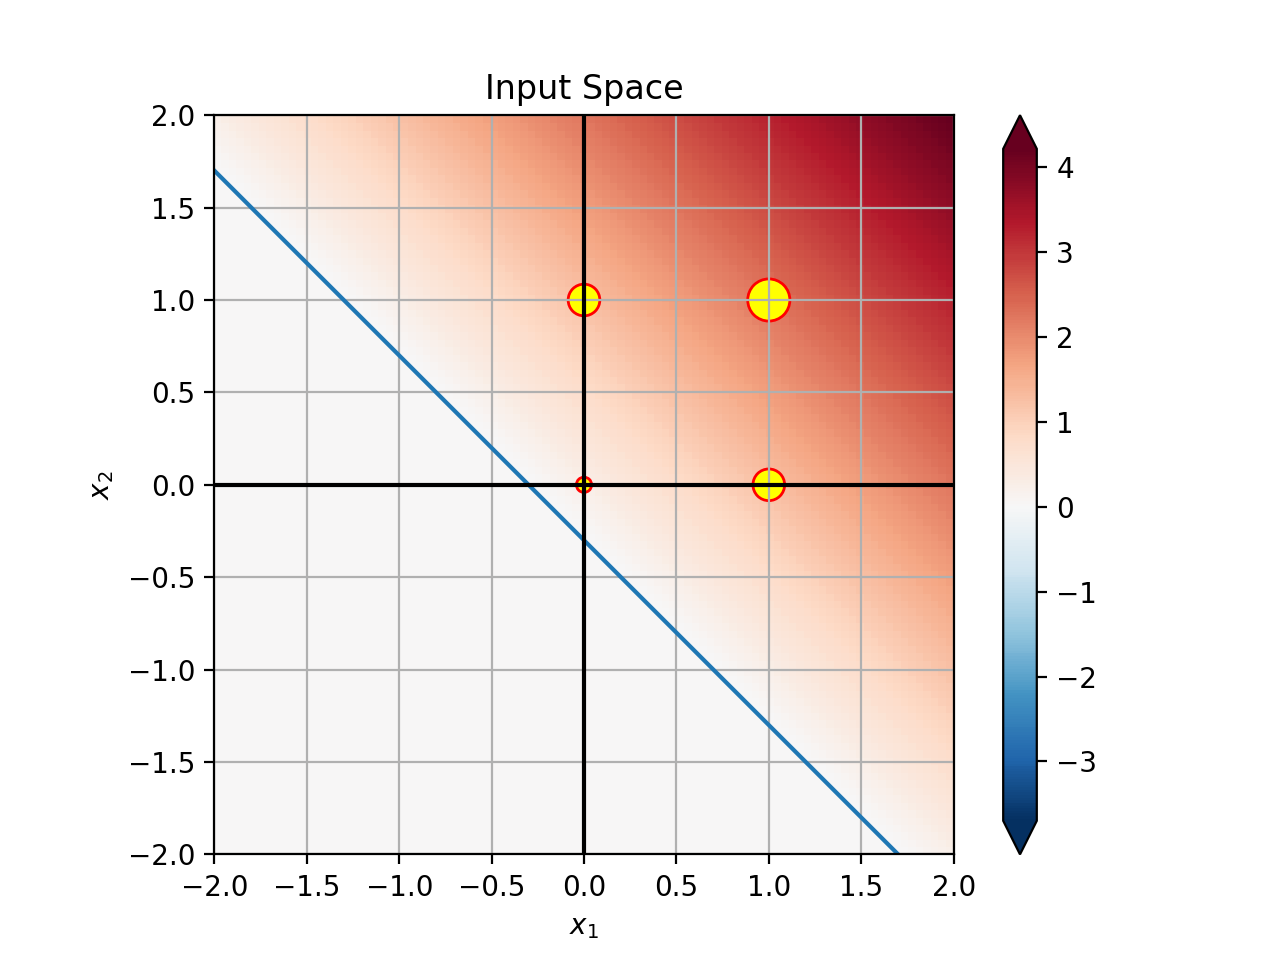

interactive(children=(FloatSlider(value=1.0, description='w11', max=2.0, min=-2.0, step=0.05), FloatSlider(value=1.0, description='w21', max=2.0, min=-2.0, step=0.05), FloatSlider(value=0.3, description='b1', max=2.0, min=-2.0, step=0.05), Output()), _dom_classes=('widget-interact',))

<function __main__.update_space_3>

In [8]:
fig5 = plt.figure()
ax5 = fig5.add_subplot(1, 1, 1)

plt.ion()
fig5.show()
fig5.canvas.draw()

x1 = np.linspace(-2.0,2.0,100)
x2 = x1*1.0
line, = ax5.plot(x1, x2)
x1v, x2v = np.meshgrid(x1, x2)

z = 1*x1v + 1*x2v + 0.3
z = z[:-1, :-1]
grid = ax5.pcolormesh(x1v, x2v, z, 
                      norm=MidpointNormalize(midpoint=0.),
                      cmap='RdBu_r')

fig5.colorbar(grid, ax=ax5, extend='both')
scat = ax5.scatter(X[:,0], X[:,1], facecolor='yellow', edgecolor='red')
prepare_plot(ax5)

def update_space_3(w11=1, w21=1, b1=0.3):
    zzz = np.maximum(w11*x1v + w21*x2v + b1,0)
    zz = zzz[:-1, :-1]
    sizes = [max(100*(w11*X[i,0] + w21*X[i,1]+b1),0) for i in range(X.shape[0])]
    if w21 != 0:
        x2 = (-w11/w21)*x1 + (-b1/w21)
        line.set_ydata(x2)
    
    grid.set_array(zz.ravel())
    scat.set_sizes(sizes)
    fig5.canvas.draw()

interact(update_space_3,w11=(-2.0, 2.0, 0.05), w21=(-2.0, 2.0, 0.05), b1=(-2.0, 2.0, 0.05))

## Gradient Descent Optimization

Now that we have prepared the overall settings, we can use an optimization method to find the optimum value for our parameters. 
<br>
Before this, we should quantify the "correctness" of our model by defining a **cost function**.

### Cost Function

Most modern neural networks are trained using **maximum likelihood**. This means that the cost function is simply the negative log-likelihood:

$$
J(\mathbf{\theta}) = -E_{X,Y} \log{p_{model}(\mathbf{y} \mid \mathbf{x})}
$$

If the neural network is designed to predict $p(\mathbf{y} \mid \mathbf{x})$, the output directly shows the cost (error).
<br>
In this case, the error for every sample is calculated using the following formula:

$$
L = -\mathbf{y} \cdot \log{\mathbf{\hat{y}}}
$$

Here, the $\cdot$ symbol denotes a dot product between vectors $\mathbf{y}$ and $\log{\mathbf{\hat{y}}}$. Vector $\mathbf{y}$ is the actual desired output vector for this sample and $\mathbf{\hat{y}}$ is the output vector predicted by the model.
<br>
If we have $N$ samples in the batch, the batch loss is:

$$
\mathbf{J} = -\frac{1}{N} \sum_{i=1}^{N}{\mathbf{y_i} \cdot \log{\mathbf{\hat{y_i}}}}
$$

### Output Units

1. **Sigmoid**: is used for Bernoulli output distribution. The output of the hidden layer ($\mathbf{h}$) is summed up to reach a real number $z = \mathbf{w}^T \mathbf{h} + b$. Then the sigmoid function is applied to the result $\hat{y}  = \sigma ( z )$. Where:
$$\sigma (t)= \frac{1}{1+e^{-t}}$$
$z$ is called the logit.
2. **softmax**: is used for Multinoulli output distribution. This function is most often used as the output of a classifier, to represent the probability distribution over $n$ different classes. Here, we calculate $\mathbf{z} = \mathbf{W}^T \mathbf{h} + \mathbf{b}$ as the logit. Then, the outputs can be calculated using below formula:
<br><br>$$softmax(z)_i = \frac{e^{z_i}}{\sum_j{e^{z_j}}}$$
If we use the log-likelihood error function, we will have:
<br><br>$$\log \; softmax(z)_i = z_i - \log{\sum_j{e^{z_j}}}$$

Let's add a sigmoid output layer after our single neuron and calculate the loss using cross-entropy.
<br>
![whole_net](images/simpleNN_whole.png)
<br>

In [9]:
def fully_connected(w11, w21, b1, x1, x2):
    h = np.maximum(w11*x1 + w21*x2 + b1,0)
    return h

def sigmoid(h):
    y = 1/(1+np.exp(-h))
    return y

def cross_entropy(y_, y):
    ce = -(y_*np.log(y) + (1-y_)*np.log(1-y))
    total_ce = np.mean(ce)
    return ce, total_ce


<IPython.core.display.Javascript object>


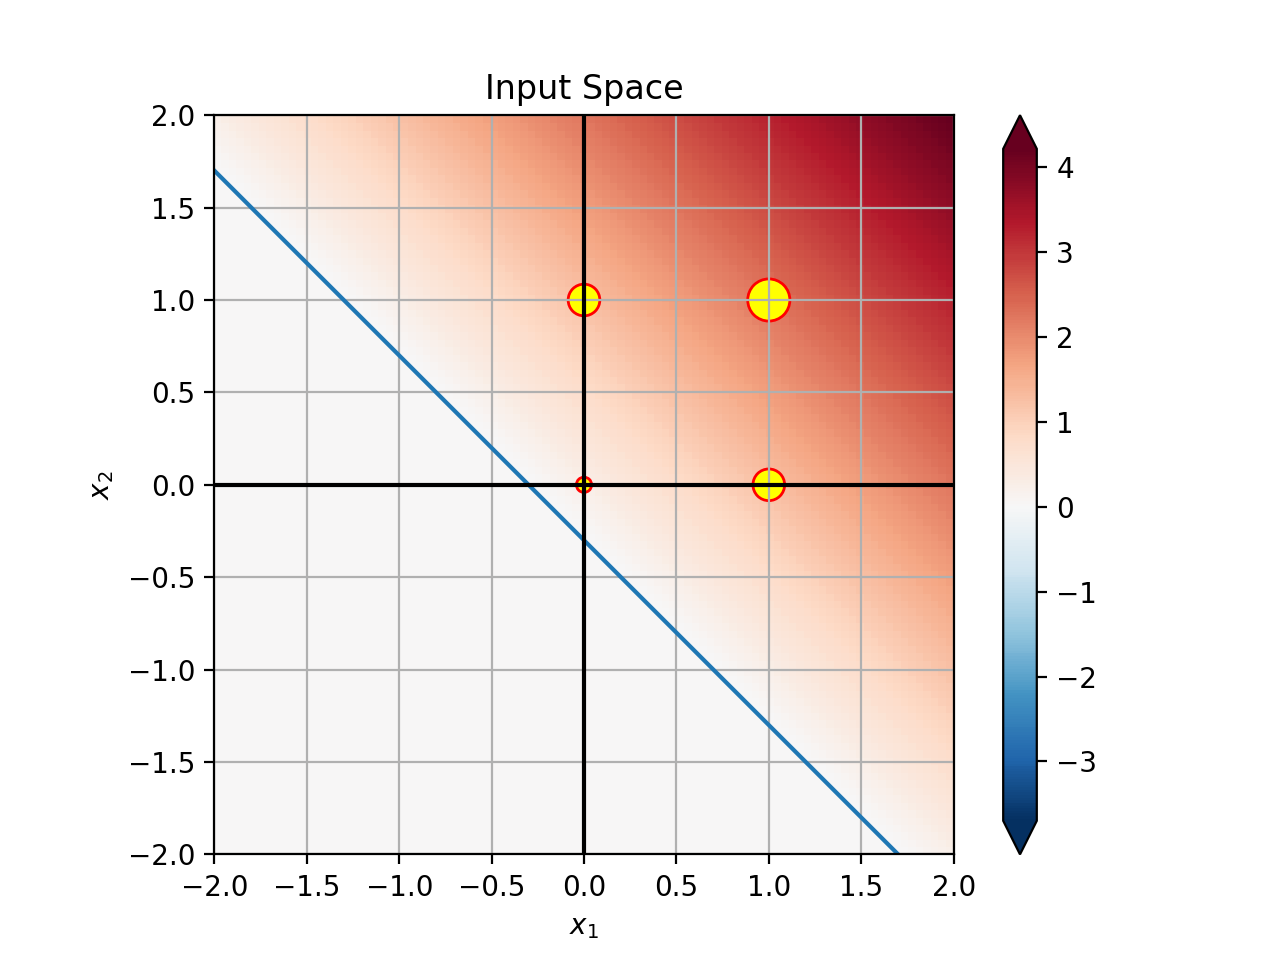

interactive(children=(FloatSlider(value=1.0, description='w11', max=2.0, min=-2.0, step=0.05), FloatSlider(value=1.0, description='w21', max=2.0, min=-2.0, step=0.05), FloatSlider(value=0.3, description='b1', max=2.0, min=-2.0, step=0.05), Output()), _dom_classes=('widget-interact',))

<function __main__.update_space_4>

In [10]:
fig6 = plt.figure()
ax6 = fig6.add_subplot(1, 1, 1)

plt.ion()
fig6.show()
fig6.canvas.draw()

x1 = np.linspace(-2.0,2.0,100)
x2 = x1*1.0
line, = ax6.plot(x1, x2)
x1v, x2v = np.meshgrid(x1, x2)

z = 1*x1v + 1*x2v + 0.3
z = z[:-1, :-1]
grid = ax6.pcolormesh(x1v, x2v, z, 
                      norm=MidpointNormalize(midpoint=0.),
                      cmap='RdBu_r')

fig6.colorbar(grid, ax=ax6, extend='both')
scat = ax6.scatter(X[:,0], X[:,1], facecolor='yellow', edgecolor='red')
prepare_plot(ax6)

def update_space_4(w11=1, w21=1, b1=0.3):
    hhh = fully_connected(w11, w21, b1, x1v, x2v)
    
#     zzz = np.maximum(w11*x1v + w21*x2v + b1,0)
    hh = hhh[:-1, :-1]
    sizes = [max(100*(w11*X[i,0] + w21*X[i,1]+b1),0) for i in range(X.shape[0])]
    
    h = fully_connected(w11, w21, b1, X[:,0], X[:,1])
    y = sigmoid(h)
    ce, total_ce = cross_entropy(Y_[:,0], y)
    print('total entropy: {}'.format(total_ce))
    
    if w21 != 0:
        x2 = (-w11/w21)*x1 + (-b1/w21)
        line.set_ydata(x2)
    
    grid.set_array(hh.ravel())
    scat.set_sizes(sizes)
    fig6.canvas.draw()
    
interact(update_space_4,w11=(-2.0, 2.0, 0.05), w21=(-2.0, 2.0, 0.05), b1=(-2.0, 2.0, 0.05))

Find the configuration with minimum cross-entropy by changing the parameters.

## Back-propagation

As you saw above, we can find the best parameters for our simple neural network by manually changing the parameters ($w_{11},\, w_{21}, \, b_1$). Now, let's talk about automating this process. <br>
Optimization can be done by driving the analytical formula for $f(\mathbf{x})$ and calculating its gradient for the parameters vector $\theta = [w_{11}, w_{21}, b_1]^T$. <br>

Unfortunately, this method does not scale well when we increase the depth and width of our network.<br>
To solve the scalability problem, a method called **back-propagation** is used.<br>

Back-propagation is a computationally efficient way to calculate the gradient of the neural network. The goal of back-prop is to create a system that produces the gradient, given the desired output of the network alongside the output predicted by current parameters.
<br>
<br>
![back-propagation system](simpleNN_backprop.png)

<br>
Let's drive the algorithm for back propagation.

To start, we simplify our model by merging the linear and non-linear nodes into one node.
<br>
![simplified version](images/simpleNN_reduced.png)

<br>

Here, our network has one hidden layer and one output layer. We assumed that the output layer is a sigmoid function. We should keep in mind that the sigmoid function is special case of the softmax function for two categories.<br>
Here, we are assuming that the output $y$ is giving us the probability of the output being equal to $1$. As the other probability ($P(Y=0)$) is obvious to be calculated by $1-y$ we can omit it.

To find the gradient of the cost function, we assume the cost function to be in this form:<br>

$$
C_{\theta} = L(y, y')
$$

We are looking of this gradient:

$$
\nabla _{\theta} C = 
\begin{bmatrix}
\frac{\partial C}{\partial w_{11}} \\
\frac{\partial C}{\partial w_{21}} \\
\frac{\partial C}{\partial b_1} \\
\end{bmatrix}
$$

From the network diagram we can write:

$$
z_1 = w_{11}x_1 + w_{21} x_2 + b_1
$$

<br>
Using this relation, we can write all elements of our gradient in terms of $\frac{\partial C}{\partial z_1}$:

<br>
$$
\begin{align}
\frac{\partial C}{\partial w_{11}} & = \frac{\partial z_1}{\partial w_{11}} \frac{\partial C}{\partial z_1} = x_1 \frac{\partial C}{\partial z_1}\\
\frac{\partial C}{\partial w_{21}} & = \frac{\partial z_1}{\partial w_{11}} \frac{\partial C}{\partial z_1} = x_2 \frac{\partial C}{\partial z_1} \\
\frac{\partial C}{\partial b_1} & = \frac{\partial z_1}{\partial b_1} \frac{\partial C}{\partial z_1} = 1 \frac{\partial C}{\partial z_1}\\
\end{align}
$$
<br>

Thus: 
$$
\nabla _{\theta} C = 
\begin{bmatrix}
x_1 \\
x_2 \\
1 \\
\end{bmatrix}
\frac{\partial C}{\partial z_1}
$$


If we can find $\frac{\partial C}{\partial z_1}$, we can calculate the gradient easily.

Again, from the network diagram, we have:

$$
y_1 = g(z_1)
$$

<b1>

Where $g$ is the non-linear function (here relu).

<br> From this equation, we can easily calculate $\frac{\partial C}{\partial z_1}$ in terms of $\frac{\partial C}{\partial y_1}$:


$$
\frac{\partial C}{\partial z_1} = g'(z_1) \frac{\partial C}{\partial y_1}
$$

<br>

Thus, if we can find $\frac{\partial C}{\partial y_1}$, we will have our gradient.

Again, from the network diagram, we have:

$$
y = \sigma(y_1)
$$

<br>
Thus:

$$
\frac{\partial C}{\partial y_1} = \sigma'(y_1) \frac{\partial C}{\partial y}
$$

By having the loss function $L$, we can drive $\frac{\partial C}{\partial y}$. <br>
Having this value, we can calculate $\frac{\partial C}{\partial y_1}$. <br>
Using this, we can calculate $\frac{\partial C}{\partial z_1}$. <br>
Then, the gradient will be obtained.

We can see this back-propagation process in the following graph:

![back_propagation_graph](images/simpleNN_back_prop.png)

<br>

The name **back-propagation** makes complete sense. Doesn't it?

Let's find the functions for our example case:

$$
C = L(y , y') = -[y' \log(y)+ (1-y') \log(1-y)] \implies 
\boxed {
    \frac{
            \partial C
        }
        {
            \partial y
    } 
    = 
    \frac{
            y-y'
        }
        {
            y(1-y)
        }
}\\ \sigma(t)=\frac{1}{1+e^{-t}} \implies \boxed{
        \sigma'(t)=\frac{e^{-t}}{(1+e^{-t})^2}= \sigma (t) (1-\sigma (t))
    }\\
    g(z) = \max \{0, z\} \implies \boxed{
    g'(z) = 
    \begin{cases}
    1 & z >0 \\
    0 & z < 0
    \end{cases}
    }\\ \boxed{
    \nabla_{\theta}z_1 = \begin{bmatrix}
x_1 \\
x_2 \\
1 \\
\end{bmatrix}
    }
$$
<br>

Using these functions, we can calculate gradient for every given sample.
<br>
Now, we can automate the optimization process to find the best value of parameters.

In [11]:
def relu(z, derivative=False):
    if derivative:
        y = np.where(z>0.0, 1.0, 0.0)
    else:
        y = np.maximum(z, 0)
        
    return y

def sigmoid(z, derivative=False):
    k = 1/(1+np.exp(-z))
    if derivative:
        y = k * (1-k)
    else:
        y = k
    return y

def loss(y, y_, derivative=False):
    if derivative:
        c = (y-y_)/y*(1-y)
    else:
        c = -(y_*np.log(y) + (1-y_)*np.log(1-y))
    
    total_c = np.mean(c)
    return c, total_c

def forward_prop(x1, x2, w11, w21, b1):
    z1 = w11*x1 + w21*x2 + b1
    y1 = relu(z1)
    z2 = y1
    y = sigmoid(z2)
    
    return y, z2, y1, z1

def backward_prop(y, y_, z2, z1, x1, x2):
    lss, batch_loss = loss(y, y_)
    del_y, total = loss(y, y_, derivative=True)
    del_y1 = del_y * sigmoid(z2, derivative=True)
    del_z1 = del_y1 * relu(z1, derivative=True)
    grad_params = np.concatenate([[x1], [x2], [np.ones(x1.shape)]])
    gradients = np.multiply(grad_params, del_z1)
    gradient_mean = np.mean(gradients, axis=1)
    
    return lss, batch_loss, gradients, gradient_mean

In [12]:
yyy_ = Y_[:,0]
x1 = X[:,0]
x2 = X[:,1]
w11 = 0.2
w21 = 0.5
b1 = -0.1

Now, we can run the **forward propagation** of the network by calling the forward_prop method and passing the inputs:

In [13]:
y, z2, y1, z1 = forward_prop(x1, x2, w11, w21, b1)

Running the **back_propagation** is just as easy:

In [14]:
lss, batch_lss, grads, grad_mean = backward_prop(y, yyy_, z2, z1,x1, x2)

It gives us everything we might need to train our model:

In [15]:
lss

array([ 0.69314718,  0.91301525,  0.74439666,  0.43748795])

In [16]:
batch_lss

0.69701176087983874

In [17]:
grads

array([[ 0.        ,  0.        ,  0.11845881, -0.0444912 ],
       [ 0.        ,  0.0964196 ,  0.        , -0.0444912 ],
       [ 0.        ,  0.0964196 ,  0.11845881, -0.0444912 ]])

In [18]:
grad_mean

array([ 0.0184919,  0.0129821,  0.0425968])

## Training the Model

Now that we have everything, let's see how the model will be trained.

<IPython.core.display.Javascript object>


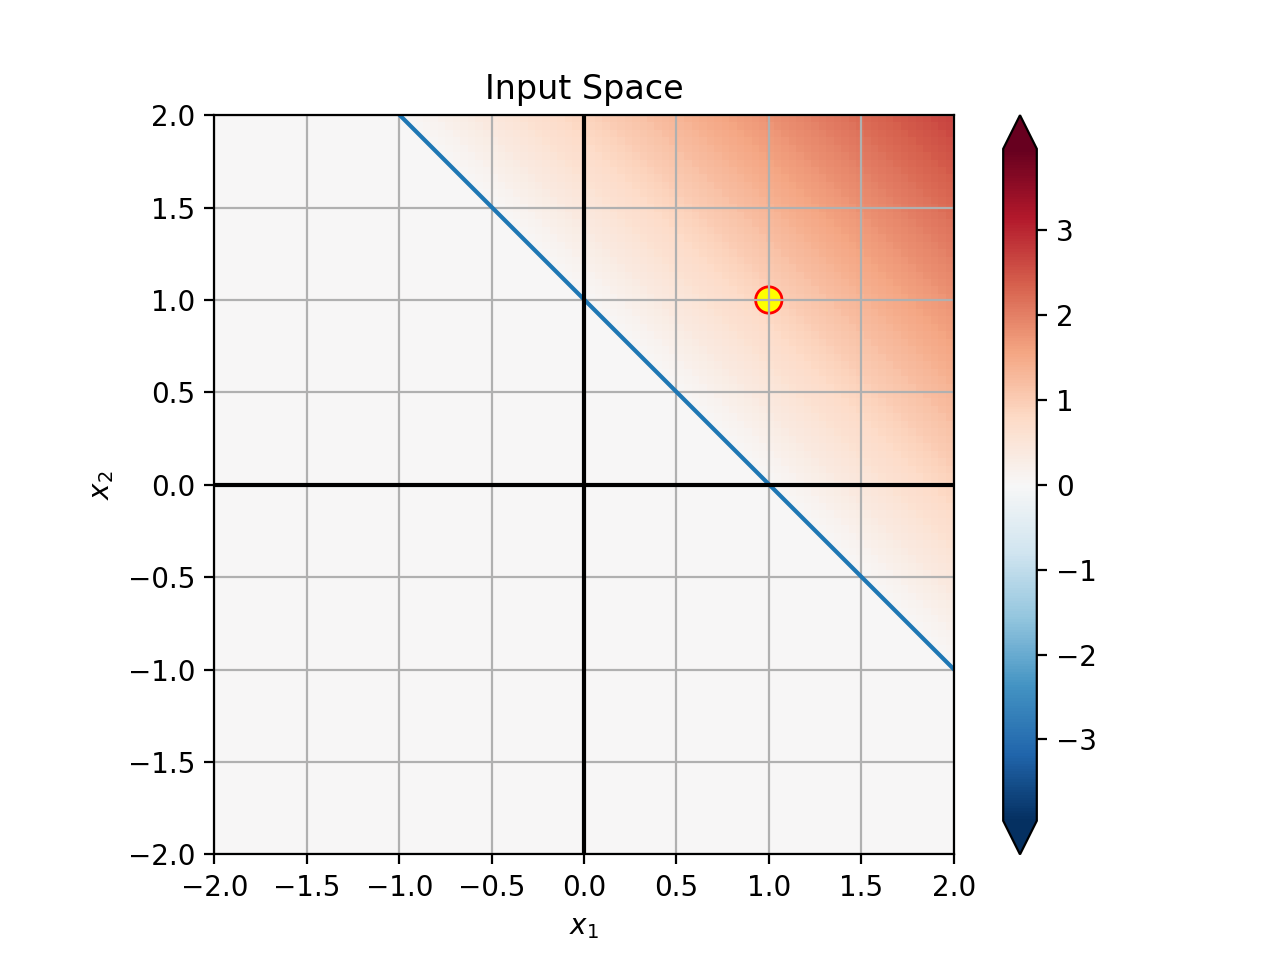

In [19]:
# model parameters
iterations = 100
learning_rate = 1

# initial value for parameters
w11 = 1.0
w21 = 1.0
b1 = 0

fig7 = plt.figure()
ax7 = fig7.add_subplot(1, 1, 1)

plt.ion()
fig7.show()
fig7.canvas.draw()

xx1 = np.linspace(-2.0,2.0,100)
# x2 = x1*1.0
xx2 = (-w11/w21)*xx1 + (-b1/w21)
line, = ax7.plot(xx1, xx2)
x1v, x2v = np.meshgrid(xx1, xx2)

z = w11*x1v + w21*x2v + b1
z = z[:-1, :-1]
grid = ax7.pcolormesh(x1v, x2v, z, 
                      norm=MidpointNormalize(midpoint=0.),
                      cmap='RdBu_r')

fig7.colorbar(grid, ax=ax7, extend='both')
scat = ax7.scatter(X[:,0], X[:,1], facecolor='yellow', edgecolor='red')
prepare_plot(ax7)

def update_space_5(w1=1, w2=1, b=0.3):
    hhh = fully_connected(w1, w2, b, x1v, x2v)
    
    hh = hhh[:-1, :-1]
    sizes = [max(100*(w1*X[i,0] + w2*X[i,1]+b),0) for i in range(X.shape[0])]
    
    if w2 != 0:
        xx2 = (-w1/w2)*xx1 + (-b/w2)
        line.set_ydata(xx2)
    
    grid.set_array(hh.ravel())
    scat.set_sizes(sizes)
    
    fig7.canvas.draw()

x1 = X[:,0]
x2 = X[:,1]
y_ = Y_[:,0]

In [20]:
for ind in range(iterations):
    
    y, z2, y1, z1 = forward_prop(x1, x2, w11, w21, b1)
    lss, batch_lss, grads, grad_mean = backward_prop(y, y_, z2, z1,x1, x2)
#     print('iteration {}- loss: {}'.format(ind, batch_lss))
    dw11 = -grad_mean[0]*learning_rate
    dw21 = -grad_mean[1]*learning_rate
    db1 = -grad_mean[2]*learning_rate
    
    w11 = w11 + dw11
    w21 = w21 + dw21
    b1 = b1 + db1
    update_space_5(w11, w21, b1)

The only parameters we should specify are learning_rate, number of iterations, and the initial value for $w_{11}$, $w_{21}$, and $b_1$.<br>
<br>
Let's initialize the weights and biases randomly and see the effect of learning_rate and number of iterations on the optimization process.

In [21]:
def initialize_weights():
    w11 = np.random.rand()*2-1
    w21 = np.random.rand()*2-1
    b1 = 0.0
    return w11, w21, b1

In [22]:
initialize_weights()

(0.6731761812999659, -0.2376384681530257, 0.0)

<IPython.core.display.Javascript object>


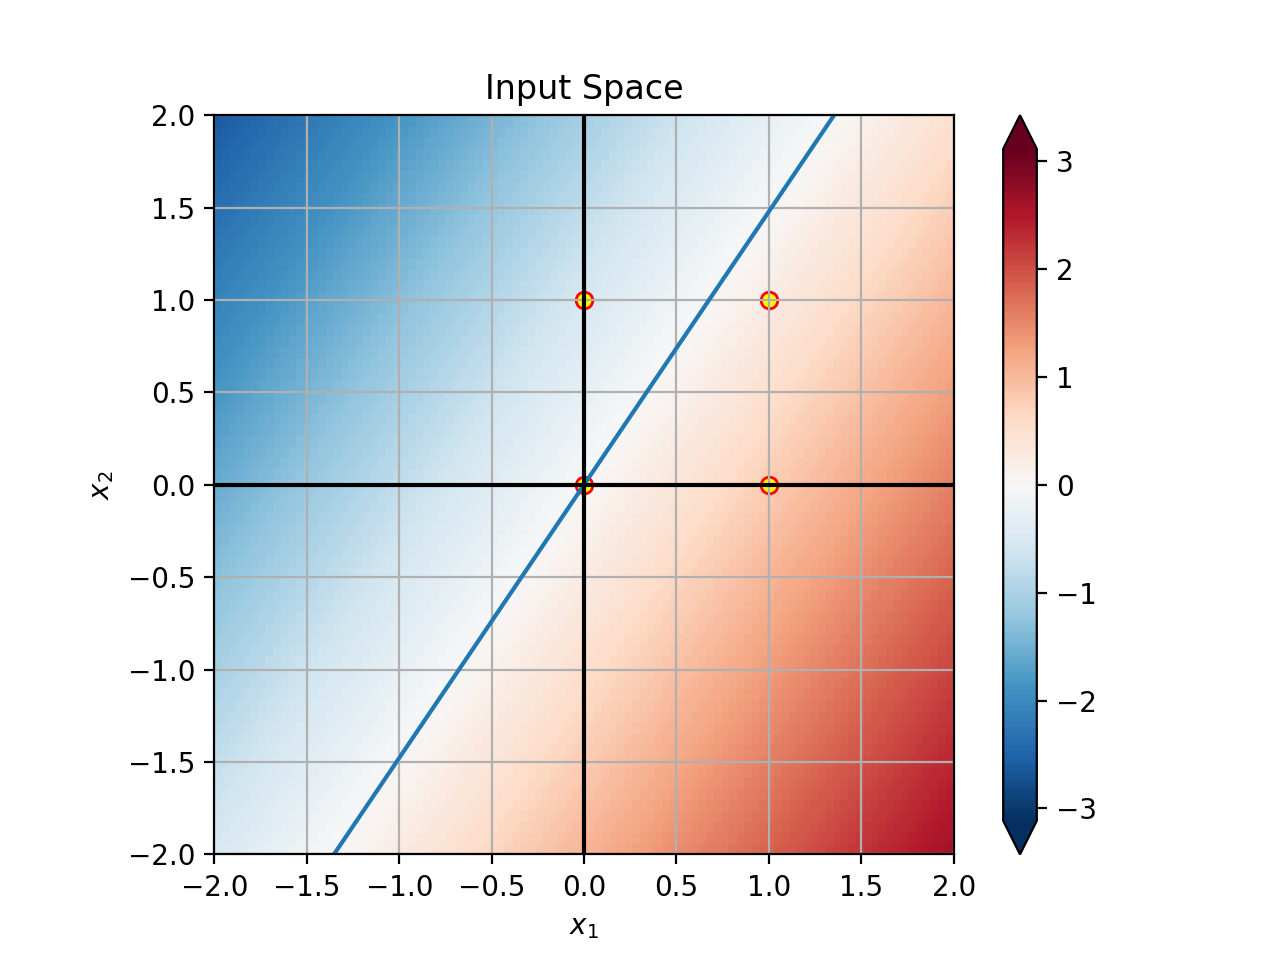

FloatSlider(value=0.9, description='learning rate', max=1.0, min=1e-05, step=1e-05)

IntSlider(value=100, description='training steps', max=1000, min=1)

Button(button_style='danger', description='Run Training', style=ButtonStyle())

In [25]:
fig8 = plt.figure()
ax8 = fig8.add_subplot(1, 1, 1)

plt.ion()
fig8.show()
fig8.canvas.draw()


btn = Button(description='Run Training', button_style='danger')
# btn.style.button_color='red'
# btn.style.text_color='white'

lr_slider = FloatSlider(value=0.9, min=1e-5, max=1.0, step=1e-5, description='learning rate')
iters_slider = IntSlider(value=100, min=1, max=1000, step=1, description='training steps')

# initial value for parameters
w11, w21, b1 = initialize_weights()


xx1 = np.linspace(-2.0,2.0,100)
# x2 = x1*1.0
xx2 = (-w11/w21)*xx1 + (-b1/w21)
line, = ax8.plot(xx1, xx2)
x1v, x2v = np.meshgrid(xx1, xx2)

z = w11*x1v + w21*x2v + b1
z = z[:-1, :-1]
grid = ax8.pcolormesh(x1v, x2v, z, 
                      norm=MidpointNormalize(midpoint=0.),
                      cmap='RdBu_r')

fig8.colorbar(grid, ax=ax8, extend='both')
scat = ax8.scatter(X[:,0], X[:,1], facecolor='yellow', edgecolor='red')
prepare_plot(ax8)

x1 = X[:,0]
x2 = X[:,1]
y_ = Y_[:,0]


def update_space_6(w1, w2, b):
    hhh = fully_connected(w1, w2, b, x1v, x2v)
    
    hh = hhh[:-1, :-1]
    sizes = [max(100*(w1*X[i,0] + w2*X[i,1]+b),0) for i in range(X.shape[0])]
    
    if w2 != 0:
        xx2 = (-w1/w2)*xx1 + (-b/w2)
        line.set_ydata(xx2)
    
    grid.set_array(hh.ravel())
    scat.set_sizes(sizes)
    fig8.canvas.draw()


def run_training(data):
    w11, w21, b1 = initialize_weights()
    # model parameters
    iterations = iters_slider.value
    learning_rate = lr_slider.value
    
    for ind in range(iterations):
    
        y, z2, y1, z1 = forward_prop(x1, x2, w11, w21, b1)
        lss, batch_lss, grads, grad_mean = backward_prop(y, y_, z2, z1,x1, x2)
    #     print('iteration {}- loss: {}'.format(ind, batch_lss))
        dw11 = -grad_mean[0]*learning_rate
        dw21 = -grad_mean[1]*learning_rate
        db1 = -grad_mean[2]*learning_rate

        w11 = w11 + dw11
        w21 = w21 + dw21
        b1 = b1 + db1
        
        ax8.set_title('Input Space- step {}- loss: {:.4f}'.format(ind+1, batch_lss))
        update_space_6(w11, w21, b1)
    

btn.on_click(run_training)
display(lr_slider, iters_slider, btn)

Learning rate is one of the **hyperparameters** of our neural network model. <br>
Hyperparameters are usually obtained using trial and error. Just like we did!

## More complex Neural Networks

We have seen the simplest neural network. It has been used to solve a very simple problem.
<br>
Despite its simplicity, the concepts used in our neural network are the same concepts used by most neural networks that are used on different applications.

<br>
Let's review these concepts:

+ **role of each neuron**: each neuron represents a line (hyper-plane in higher dimensional input spaces) that separates the input space in two parts. The linear output of the neuron ($z$) gives us a measure of closeness to the line for every training or test sample.
+ **activation function**: translates the closeness to the line represented by the neuron ($z$) into the meaning we want. <br>When we use **relu**, we are treating all points in one side of the line (hyper-plane) to be identical. Here, the goal is to put points in one side of the line. We don't care where the point resides inside the region. Other activation functions may give different meanings to the whole input space and role of each neuron.
+ **output layer**: summarizes the result of previous layers to the form we desire. We usually use**softmax** for probability distribution ($P(Y \mid X)$).
+ **back-propagation**: is a method to generate the gradient of the cost function relative to the parameters of our model for any given input. Here, when we define the network by specifying its parameters (number of layers, number of neurons in each layer, activation functions for each layer, output layer, and the cost function), we also create a computational graph to calculate the changes for each parameter. <br> Now, let's see this process for the general case.

## Back-propagation in general

The general rule for back-propagating error in a neural network is very similar to the simple case we saw here.
<br>
Imagine two consecutive layers of a neural network. We take one neuron from the first layer (neuron $i$) and one neuron from the next layer (neuron $j$).
<br>

The set up is shown below:
<br>
![back_prop_general](images/backpropagation_general.png)

In this structure, we know:

$$
\begin{align}
z_j &= b_j + \sum_i{y_i w_{ij}} \tag{1} \\
y_j &=g_j(z_j) \tag{2} \\
\end{align}
$$

From equation $(2)$ we can drive the formula to bring the error from output of neuron $j$ to its input:

$$
\frac{\partial C}{\partial z_j} = g'(z_j)\frac{\partial C}{\partial y_j} \tag{3}
$$

<br>
A small change in $y_i$ will propagate through connections to the next layer $j$ through connections $w_{ij}$. Thus, we can write:

$$
\frac{\partial C}{\partial y_i} = \sum_j{\frac{\partial z_j}{\partial y_j} \frac{\partial C}{\partial z_j}} = \sum_j{w{ij} \frac{\partial C}{\partial z_j}} \tag{4}
$$

And finally, we can drive the partial derivative in respect to the parameters of the $j^{th}$ layer:

$$
\frac{\partial C}{ \partial w_{ij}} = \frac{\partial z_j}{\partial w_{ij}} \frac{\partial C}{\partial z_j} = y_i \frac{\partial C}{\partial z_j} \tag{5}
$$


<br>

By using equations $(3)-(5)$ we have propagated the error signal from output of layer $j$ to the output of layer $i$ cand calculated the required terms for gradient of the cost function in respect to $w_{ij}$ and $b_j$ (how?). We will continue the same process for layer $i$ and its previous layer untill all terms of the gradient are calculated. 

And this was the back-propagation for general case.
